In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Clustered_Data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,pH,EC,OC,N,P,K,S,Zn,Fe,Cu,Mn,Target
0,7.9,0.13,0.54,375.3,19.52,267.31,9.65,0.68,7.18,0.28,2.36,0
1,7.6,0.13,0.48,333.6,24.77,297.26,7.00,0.66,8.22,0.36,2.40,2
2,7.5,0.14,0.40,278.0,24.02,276.30,10.25,0.64,8.24,0.34,2.42,2
3,7.3,0.15,0.50,347.5,17.26,223.60,6.75,0.66,7.36,0.26,2.56,0
4,6.9,0.15,0.44,305.8,16.51,269.10,8.23,0.68,7.28,0.30,2.60,2


In [31]:
df1 = df[df['Target'] == 0]
df2 = df[df['Target'] == 1]
df3 = df[df['Target'] == 2]

In [11]:
df3 = pd.read_csv('SubData2.csv')
df1 = pd.read_csv('SubData1.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df3.drop(['Unnamed: 0'], axis=1, inplace=True)
#df2.info()
#df3.info()

In [38]:
X = df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values

In [39]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [40]:
import matplotlib.pyplot as plt

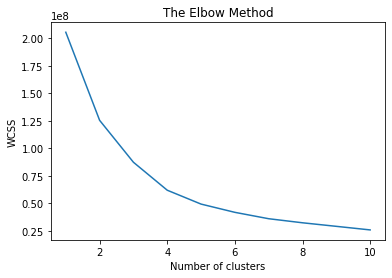

In [41]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)



In [43]:
df1['Sub_Target'] = pd.DataFrame(y_kmeans)

In [48]:
Y = df3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values



In [49]:
from sklearn.cluster import KMeans
wcss1 = []
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans1.fit(Y)
    wcss1.append(kmeans1.inertia_)


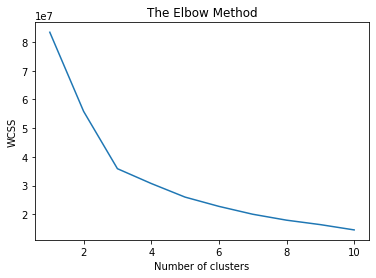

In [50]:
plt.plot(range(1, 11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [51]:
kmeans1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans1 = kmeans1.fit_predict(Y)


In [52]:
df3['Sub_Target'] = pd.DataFrame(y_kmeans1)

In [59]:
from sklearn.decomposition import PCA 
  
pca1 = PCA(2) 
pca1.fit(df1) 
  
pca_data1 = pd.DataFrame(pca1.transform(df1)) 
  
print(pca_data1.head())

           0           1
0  60.838802  -88.884468
1  18.757812 -119.151858
2  17.469142 -105.222601
3  94.004546  -73.267809
4  69.049861  -96.678773


In [55]:
from sklearn.decomposition import PCA 
  
pca1 = PCA(2) 
pca1.fit(df3) 
  
pca_data1 = pd.DataFrame(pca1.transform(df3)) 
  
print(pca_data1.head())



            0          1
0  150.978435  -5.122574
1   98.446383  22.557793
2  111.623314  -3.190516
3 -119.734170 -44.732548
4 -153.365963  23.065031


In [60]:
pca_1 = pca_data1.iloc[:,[0,1]].values


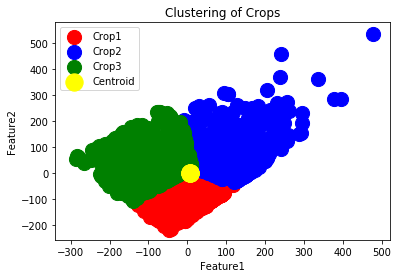

In [58]:
plt.scatter(pca_1[y_kmeans1==0, 0], pca_1[y_kmeans1==0, 1], s=200, c='red', label='Crop1')
plt.scatter(pca_1[y_kmeans1==1, 0], pca_1[y_kmeans1==1, 1], s=200, c='blue', label='Crop2')
plt.scatter(pca_1[y_kmeans1==2, 0], pca_1[y_kmeans1==2, 1], s=200, c='green', label='Crop3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clustering of Crops')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

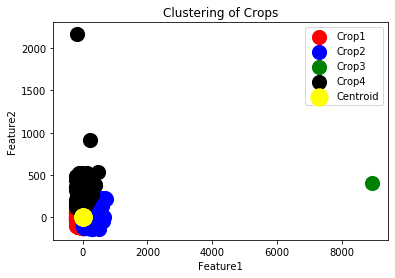

In [61]:
plt.scatter(pca_1[y_kmeans==0, 0], pca_1[y_kmeans==0, 1], s=200, c='red', label='Crop1')
plt.scatter(pca_1[y_kmeans==1, 0], pca_1[y_kmeans==1, 1], s=200, c='blue', label='Crop2')
plt.scatter(pca_1[y_kmeans==2, 0], pca_1[y_kmeans==2, 1], s=200, c='green', label='Crop3')
plt.scatter(pca_1[y_kmeans==3, 0], pca_1[y_kmeans==3, 1], s=200, c='black', label='Crop4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clustering of Crops')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

In [12]:
frame = [df1,df3]

df_final = pd.concat(frame)



In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15149 entries, 0 to 6899
Data columns (total 13 columns):
pH            15149 non-null float64
EC            15149 non-null float64
OC            15149 non-null float64
N             15149 non-null float64
P             15149 non-null float64
K             15149 non-null float64
S             15149 non-null float64
Zn            15149 non-null float64
Fe            15149 non-null float64
Cu            15149 non-null float64
Mn            15149 non-null float64
Target        15149 non-null int64
Sub_Target    15149 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1.6 MB
